In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_AllAgree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/License.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/README.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_75Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_50Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_66Agree.txt


In [73]:
df=pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv',encoding='latin-1', names=['sentiment', 'text'])

In [75]:
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [77]:
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob  
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier 
from nltk.tokenize import word_tokenize,sent_tokenize

In [78]:
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{'any', 've', 'has', 'm', ',', 'with', 'hasn', 'theirs', 'through', 'ma', 'mustn', '.', 'it', 'from', 'won', 'other', 'where', '+', '[', 'those', "isn't", "mightn't", 'below', '{', 'again', 'over', 'that', 'are', 'who', 'out', 'by', 'up', 'd', "didn't", 'was', ':', 'down', 'off', 'own', 'why', 'its', 'were', 'in', '@', '}', 'but', '*', '`', 'had', 'him', 'them', "wasn't", '~', 'haven', 'needn', "hasn't", '#', 'themselves', 'weren', ';', 'now', 'doesn', 'hadn', 'isn', 'their', 'of', "weren't", 'so', "'", '^', 'some', 'ain', 'her', 'same', 'myself', 'can', 'very', '\\', 'all', 'should', "you've", 'don', 'be', 'before', 'after', 'under', 'nor', 'the', 'hers', "needn't", 'which', "it's", "shouldn't", 'no', 'she', 'my', 'itself', '$', 'against', 'i', 'we', "wouldn't", 'these', 'because', 'and', '=', 're', '(', ']', 'ourselves', "shan't", ')', 'they', 'how', 'your', 'have', 'herself', '-', 'there', 'doing', 'been', 'only', 'until', 'wouldn', 'at', '<', "you'll", 'a', 'wasn', "won't", "that'l

In [79]:
# this function return the part of speech of a word.
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [80]:
# Function to clean our text.
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [82]:
df.text = df.text.apply(clean_review)
df.text = df.text.apply(join_text)

In [83]:
df.head()

,sentiment,text
0,neutral,According Gran company plan move production Ru...
1,neutral,"Technopolis plan develop stage area less 100,0..."
2,negative,international electronic industry company Elco...
3,positive,new production plant company would increase ca...
4,positive,According company 's update strategy year 2009...


In [85]:
# splitting data.
x_train,x_test,y_train,y_test = train_test_split(df.text,df.sentiment,test_size = 0.2 , random_state = 0)

In [86]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

In [87]:
pos = x_train[y_train[y_train=='positive'].index]
neg = x_train[y_train[y_train=='negative'].index]
neutral = x_train[y_train[y_train=='negative'].index]

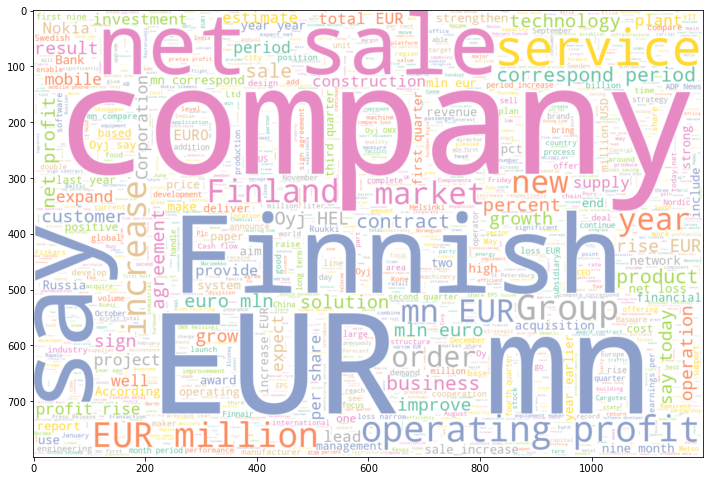

In [88]:
plt.figure(figsize = (12,12)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800,
                      background_color='white',colormap='Set2_r').generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

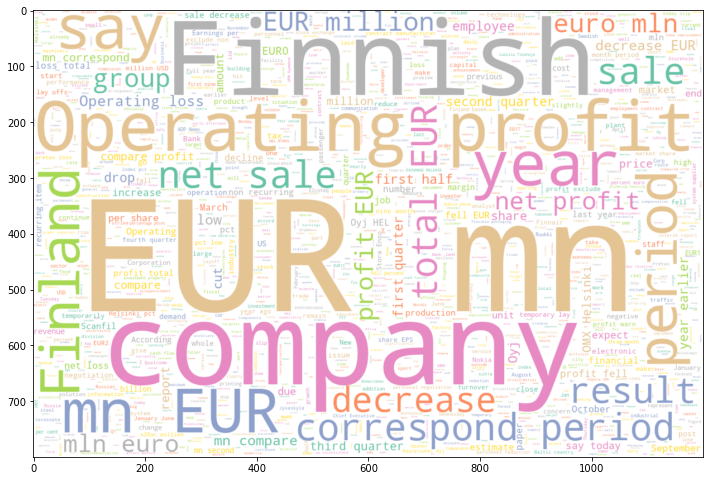

In [89]:
plt.figure(figsize = (12,12)) # Text Reviews with negatve Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800,
                      background_color='white',colormap='Set2_r').generate(" ".join(neg))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [91]:
Text_1=df.text

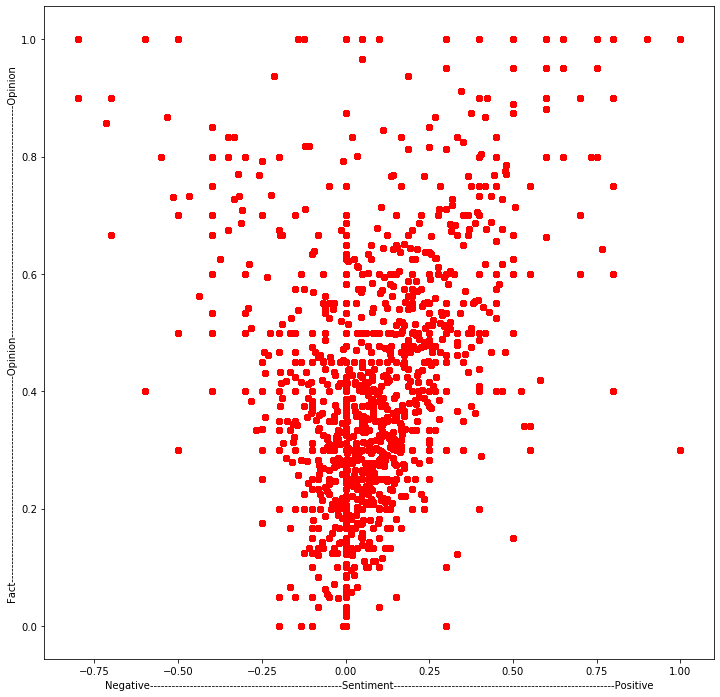

In [92]:
Q=[]
P=[]
plt.figure(figsize = (12,12)) 
for i in Text_1:
    Q.append(TextBlob(i).sentiment.polarity )
    P.append(TextBlob(i).sentiment.subjectivity )
    plt.scatter(Q,P,c='r')
plt.xlabel('Negative-----------------------------------------------------Sentiment-------------------------------------------------------------Positive')
plt.ylabel('Fact---------------------------------------------------------Opinion----------------------------------------------------------------Opinion')
plt.show();

From Above graph we can analysis that maximum statements are Neutral,also Postive statments are more as compare to Negative statement.
So, Neutral > Postive > Negative

In [93]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [94]:
df['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

*So our analysis was right after looking at graph*

 # Artificial Neural Networks Classifier using MLPClassifier

In this deeplearning we would be creating 2 hidden layer, Hidden Layer1 = 100 neurons and Hidden Layer2 = 50 neurons.
Activaion Function used will be relu, solver as adam and learing rate initial it was 0.0001 the after itartion, it should me best as 1. Max_iter as 300.

In [96]:

pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                     ('mlp',MLPClassifier(hidden_layer_sizes= (100,50), 
                                          activation='relu',
                                          solver='adam',
                                          alpha=1,
                                          max_iter=300 ))])

In [99]:
parameters = {'mlp__alpha':(0.001,0.01,0.1,1.0), 
              'mlp__max_iter':(100,300)} 

> parameters = {'mlp__alpha':(0.001,0.01,0.1,0.3,0.5,1.0), 
              'mlp__max_iter':(100,200,300)} initial i had used this parameters for first time.

In [100]:
grid_search_nn = GridSearchCV(pipeline,
                              parameters,
                              n_jobs=-1,
                              cv=5,
                              verbose=1, 
                              scoring='accuracy') 
grid_search_nn.fit(x_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.8min finished
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 24.8min finished

Fitting 5 folds for each of 18 candidates, totalling 90 fits

In [101]:
print ('\n\nNeural Network Best Training score: %0.3f' % grid_search_nn.best_score_) 
print ('\nNeural Network Best parameters set:') 
best_parameters = grid_search_nn.best_estimator_.get_params() 
for param_name in sorted(parameters.keys()): 
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))



Neural Network Best Training score: 0.736

Neural Network Best parameters set:
	mlp__alpha: 1.0
	mlp__max_iter: 100


In [102]:
predictions_train = grid_search_nn.predict(x_train) 
predictions_test = grid_search_nn.predict(x_test) 
print ("\nNeural Network Training accuracy:",
       round(accuracy_score(y_train, predictions_train),
             4)) 
print ("\nNeural Network Complete report of Training data\n",
       classification_report(y_train, predictions_train)) 
print ("\n\nNeural Network Grid Search- Train Confusion Matrix\n\n",
       pd.crosstab(y_train, predictions_train,rownames = ["Actuall"],
                   colnames = ["Predicted"]))


Neural Network Training accuracy: 0.9951

Neural Network Complete report of Training data
               precision    recall  f1-score   support

    negative       0.98      0.99      0.99       476
     neutral       1.00      1.00      1.00      2304
    positive       0.99      0.99      0.99      1096

    accuracy                           1.00      3876
   macro avg       0.99      0.99      0.99      3876
weighted avg       1.00      1.00      1.00      3876



Neural Network Grid Search- Train Confusion Matrix

 Predicted  negative  neutral  positive
Actuall                               
negative        471        3         2
neutral           2     2298         4
positive          7        1      1088


In [103]:
print ("\n\nNeural Network Testing accuracy:",round(accuracy_score(y_test, predictions_test),4)) 
print ("\nNeural Network Complete report of Testing data\n",
       classification_report( y_test, predictions_test)) 
print ("\n\nNeural Network Grid Search- Test Confusion Matrix\n\n",
       pd.crosstab(y_test, predictions_test,rownames = ["Actuall"],colnames = ["Predicted"]))



Neural Network Testing accuracy: 0.7309

Neural Network Complete report of Testing data
               precision    recall  f1-score   support

    negative       0.71      0.47      0.56       128
     neutral       0.78      0.84      0.81       575
    positive       0.63      0.62      0.63       267

    accuracy                           0.73       970
   macro avg       0.70      0.64      0.67       970
weighted avg       0.73      0.73      0.73       970



Neural Network Grid Search- Test Confusion Matrix

 Predicted  negative  neutral  positive
Actuall                               
negative         60       47        21
neutral          15      483        77
positive         10       91       166


So by using GridSearchCV,MLPClassifier & Pipeline - Neural Network Testing accuracy we get is 73.09% which is good enough for our model